<a href="https://colab.research.google.com/github/ArchanaMahto/Regression_Model/blob/main/FINALFinalLastSTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
'''import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge'''

'import pandas as pd\nimport numpy as np\nfrom datetime import datetime\nimport warnings\n\n# Visualization\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport plotly.express as px\n\n# Machine Learning Preprocessing and Modeling\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score\nfrom sklearn.linear_model import LinearRegression, Lasso, Ridge'

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Model Explainability
import shap

In [88]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Model Explainability
# import shap  # Uncomment if needed


In [89]:
# Load Dataset
url = "/content/Copy of data_YesBank_StockPrices.csv"
df = pd.read_csv(url)

In [90]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [91]:
# Dataset Rows & Columns count
df.shape

(185, 5)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [93]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [94]:
# Dataset Duplicate Value Count
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [95]:
missing_values = df.isnull().sum()
print("Missing/Null values per column:\n", missing_values)


Missing/Null values per column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [96]:
# Dataset Columns

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [97]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [98]:
# Check Unique Values for each variable.
df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


In [99]:
print(df['Date'])

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object


In [100]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')


In [101]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [102]:
print(df.dtypes)

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
Month             int32
Year              int32
dtype: object


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Feature Selection: add 'Month' and 'Year'
X = df[['Open', 'High', 'Low', 'Month', 'Year']]
y = df['Close']

# 2. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaled features are now X_train_scaled and X_test_scaled, with Month and Year included.


In [104]:
df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


In [105]:
X_train

,Open,High,Low,Month,Year
65,61.80,68.36,55.44,12,2010
67,53.00,57.69,46.71,2,2011
31,50.88,53.97,44.40,2,2008
12,16.00,17.20,13.82,7,2006
41,12.40,16.56,11.13,12,2008
...,...,...,...,...,...
106,88.80,117.60,86.98,5,2014
14,18.00,18.88,16.80,9,2006
92,94.00,100.15,83.42,3,2013
179,27.75,31.95,25.55,6,2020


In [106]:
y_train

,Close
65,62.54
67,51.29
31,49.42
12,16.16
41,15.03
...,...
106,113.89
14,18.46
92,85.71
179,25.60


In [107]:
'''print("Train Date Range:", df.loc[X_train.index, 'Date'].min(), "to", df.loc[X_train.index, 'Date'].max())
print("Test Date Range :", df.loc[X_test.index, 'Date'].min(), "to", df.loc[X_test.index, 'Date'].max())'''


'print("Train Date Range:", df.loc[X_train.index, \'Date\'].min(), "to", df.loc[X_train.index, \'Date\'].max())\nprint("Test Date Range :", df.loc[X_test.index, \'Date\'].min(), "to", df.loc[X_test.index, \'Date\'].max())'

In [108]:
'''# StandardScaler should be fit on X_train only, as you’ve shown
print("Scaler fitted only on training data? True = correct:", hasattr(scaler, 'n_samples_seen_'))'''


'# StandardScaler should be fit on X_train only, as you’ve shown\nprint("Scaler fitted only on training data? True = correct:", hasattr(scaler, \'n_samples_seen_\'))'

In [109]:
'''import matplotlib.pyplot as plt

plt.hist(y_train, bins=20, alpha=0.5, label='Train')
plt.hist(y_test, bins=20, alpha=0.5, label='Test')
plt.legend()
plt.title('Distribution of Target Variable (Close)')
plt.show()'''


"import matplotlib.pyplot as plt\n\nplt.hist(y_train, bins=20, alpha=0.5, label='Train')\nplt.hist(y_test, bins=20, alpha=0.5, label='Test')\nplt.legend()\nplt.title('Distribution of Target Variable (Close)')\nplt.show()"

In [110]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# USE SCALED DATA from previous step
# X_train_scaled, X_test_scaled, y_train, y_test

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    k = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    print(f"\nModel: {name}")
    print(f"Training Score: {train_score}")
    print(f"MAE  : {mae}")
    print(f"MSE  : {mse}")
    print(f"RMSE : {rmse}")
    print(f"R²   : {r2}")
    print(f"AdjR²: {adj_r2}")
    print((mae, mse, float(rmse), r2, adj_r2))

# LASSO REGRESSION
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
evaluate_model("Lasso", lasso, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_lasso = {'alpha': [0.01, 0.1, 1, 5, 10]}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_lasso.best_estimator_
evaluate_model("Lasso (Tuned)", best_lasso, X_train_scaled, y_train, X_test_scaled, y_test)

# ELASTIC NET
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train_scaled, y_train)
evaluate_model("Elastic Net", enet, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_enet = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
grid_enet = GridSearchCV(ElasticNet(), param_grid_enet, cv=5)
grid_enet.fit(X_train_scaled, y_train)
best_enet = grid_enet.best_estimator_
evaluate_model("Elastic Net (Tuned)", best_enet, X_train_scaled, y_train, X_test_scaled, y_test)

# RIDGE REGRESSION
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
evaluate_model("Ridge", ridge, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_ridge = {'alpha': [0.01, 0.1, 1, 5, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_ridge.best_estimator_
evaluate_model("Ridge (Tuned)", best_ridge, X_train_scaled, y_train, X_test_scaled, y_test)



Model: Lasso
Training Score: 0.9928911436954917
MAE  : 6.527917903072148
MSE  : 109.11999284443459
RMSE : 10.44605154325952
R²   : 0.9879276462394306
AdjR²: 0.9859804924070807
(6.527917903072148, 109.11999284443459, 10.44605154325952, 0.9879276462394306, 0.9859804924070807)

Model: Lasso (Tuned)
Training Score: 0.9961687220182786
MAE  : 5.892457859016796
MSE  : 84.04629785570005
RMSE : 9.167676797078967
R²   : 0.9907016430854546
AdjR²: 0.9892019080992376
(5.892457859016796, 84.04629785570005, 9.167676797078967, 0.9907016430854546, 0.9892019080992376)

Model: Elastic Net
Training Score: 0.9602351850218407
MAE  : 15.697515309601414
MSE  : 450.0878088541896
RMSE : 21.21527300918349
R²   : 0.9502050988992121
AdjR²: 0.9421736632377947
(15.697515309601414, 450.0878088541896, 21.21527300918349, 0.9502050988992121, 0.9421736632377947)

Model: Elastic Net (Tuned)
Training Score: 0.995846954103976
MAE  : 5.9147226614190265
MSE  : 86.73213908505039
RMSE : 9.313009131588478
R²   : 0.9904044984044

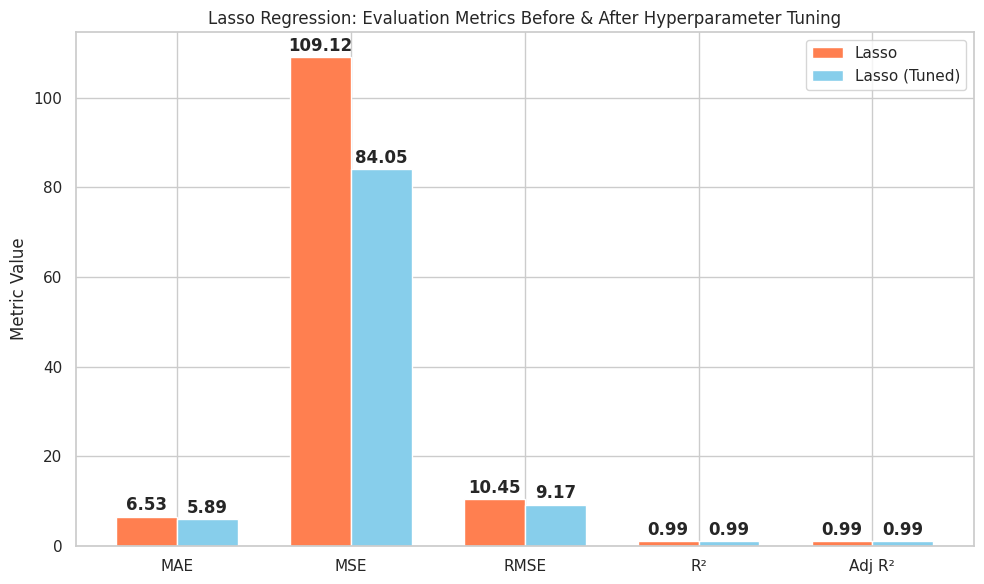

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']

# Metric values for Lasso and Lasso (Tuned)
lasso_scores = [6.53, 109.12, 10.45, 0.988, 0.986]
lasso_tuned_scores = [5.89, 84.05, 9.17, 0.991, 0.989]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, lasso_scores, width, label='Lasso', color='coral')
bars2 = ax.bar(x + width/2, lasso_tuned_scores, width, label='Lasso (Tuned)', color='skyblue')

# Add metric value labels on top of bars
for i in range(len(metrics)):
    ax.text(x[i] - width/2, lasso_scores[i] + 0.5, f"{lasso_scores[i]:.2f}", ha='center', va='bottom', fontweight='bold')
    ax.text(x[i] + width/2, lasso_tuned_scores[i] + 0.5, f"{lasso_tuned_scores[i]:.2f}", ha='center', va='bottom', fontweight='bold')

ax.set_ylabel("Metric Value")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Lasso Regression: Evaluation Metrics Before & After Hyperparameter Tuning")
ax.legend()

plt.tight_layout()
plt.show()


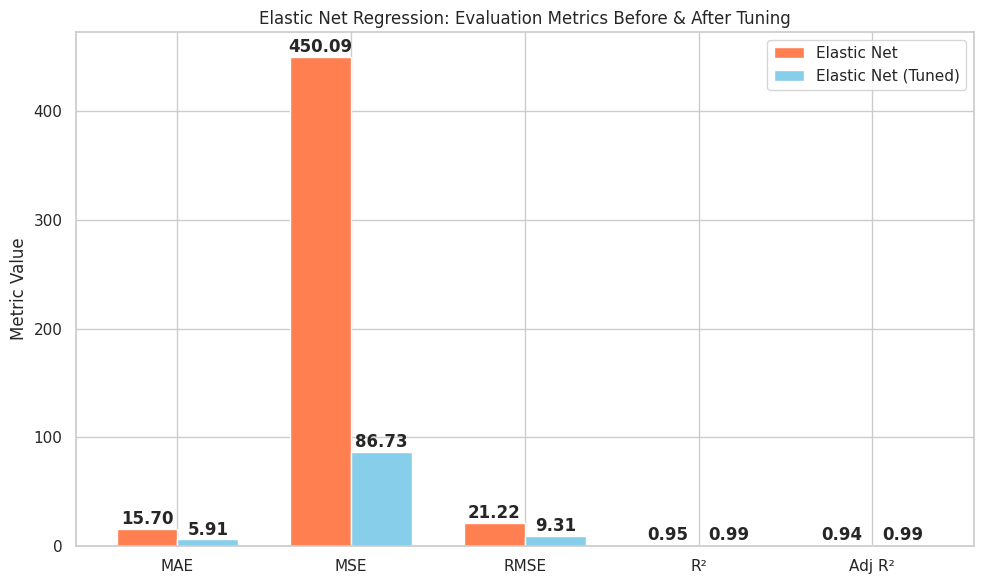

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']

# Metric values for Elastic Net and Elastic Net (Tuned)
enet_scores = [15.70, 450.09, 21.22, 0.950, 0.942]
enet_tuned_scores = [5.91, 86.73, 9.31, 0.990, 0.989]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, enet_scores, width, label='Elastic Net', color='coral')
bars2 = ax.bar(x + width/2, enet_tuned_scores, width, label='Elastic Net (Tuned)', color='skyblue')

# Add metric value labels on top of bars
for i in range(len(metrics)):
    ax.text(x[i] - width/2, enet_scores[i] + 0.5, f"{enet_scores[i]:.2f}", ha='center', va='bottom', fontweight='bold')
    ax.text(x[i] + width/2, enet_tuned_scores[i] + 0.5, f"{enet_tuned_scores[i]:.2f}", ha='center', va='bottom', fontweight='bold')

ax.set_ylabel("Metric Value")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Elastic Net Regression: Evaluation Metrics Before & After Tuning")
ax.legend()

plt.tight_layout()
plt.show()


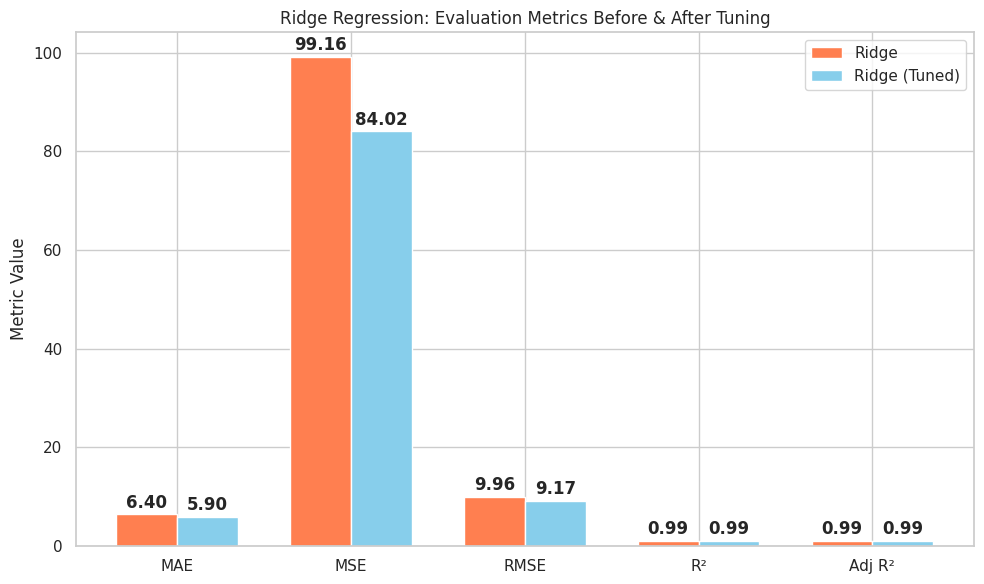

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']

# Ridge model metrics
ridge_scores = [6.40, 99.16, 9.96, 0.989, 0.987]
ridge_tuned_scores = [5.90, 84.02, 9.17, 0.991, 0.989]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, ridge_scores, width, label='Ridge', color='coral')
bars2 = ax.bar(x + width/2, ridge_tuned_scores, width, label='Ridge (Tuned)', color='skyblue')

# Add metric value labels above each bar
for i in range(len(metrics)):
    ax.text(x[i] - width/2, ridge_scores[i] + 0.5, f"{ridge_scores[i]:.2f}", ha='center', va='bottom', fontweight='bold')
    ax.text(x[i] + width/2, ridge_tuned_scores[i] + 0.5, f"{ridge_tuned_scores[i]:.2f}", ha='center', va='bottom', fontweight='bold')

ax.set_ylabel("Metric Value")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Ridge Regression: Evaluation Metrics Before & After Tuning")
ax.legend()

plt.tight_layout()
plt.show()


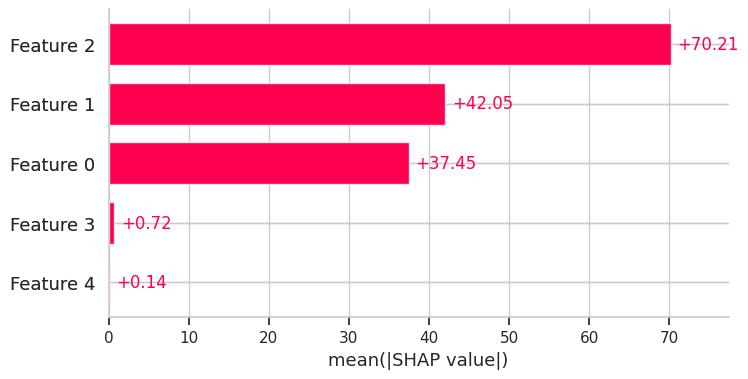

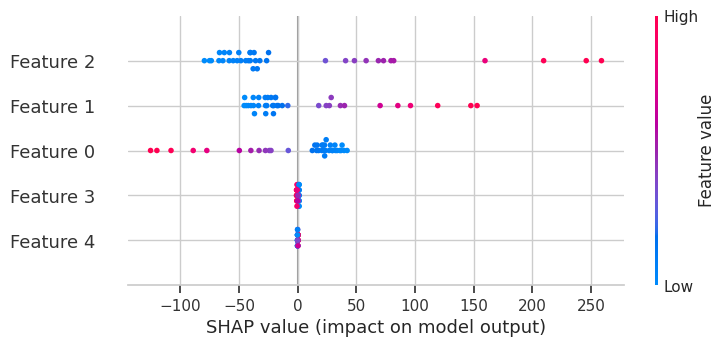

In [114]:
import shap

# Select your tuned model, e.g., best_ridge
model = best_ridge  # or best_lasso / best_enet

# Use the scaled test data to match how the model was trained
X_to_explain = X_test_scaled  # This includes ['Open', 'High', 'Low', 'Month', 'Year'] (scaled)

# Create SHAP Explainer for linear models
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_to_explain)

# Feature importance bar plot (shows top 10 by default)
shap.plots.bar(shap_values, max_display=10)

# Optionally, summary (beeswarm) plot:
shap.plots.beeswarm(shap_values, max_display=10)


In [115]:
'''import matplotlib.pyplot as plt
import numpy as np

# Extract mean(|SHAP value|) for each feature
feature_importance = np.abs(shap_values.values).mean(axis=0)
features = shap_values.feature_names

# Sort features (optional)
indices = np.argsort(feature_importance)
sorted_importance = feature_importance[indices]
sorted_features = np.array(features)[indices]

# Plot with pastel pink color
plt.figure(figsize=(8,5))
plt.barh(sorted_features, sorted_importance, color="#FFC0CB")
plt.xlabel("Mean(|SHAP value|)")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
'''

'import matplotlib.pyplot as plt\nimport numpy as np\n\n# Extract mean(|SHAP value|) for each feature\nfeature_importance = np.abs(shap_values.values).mean(axis=0)\nfeatures = shap_values.feature_names\n\n# Sort features (optional)\nindices = np.argsort(feature_importance)\nsorted_importance = feature_importance[indices]\nsorted_features = np.array(features)[indices]\n\n# Plot with pastel pink color\nplt.figure(figsize=(8,5))\nplt.barh(sorted_features, sorted_importance, color="#FFC0CB")\nplt.xlabel("Mean(|SHAP value|)")\nplt.title("Feature Importance")\nplt.tight_layout()\nplt.show()\n'

In [116]:
'''import matplotlib.pyplot as plt
import numpy as np

# Extract mean absolute SHAP value for each feature
feature_importance = np.abs(shap_values.values).mean(axis=0)
features = shap_values.feature_names  # This should be a list of feature names

# Sort the features by importance
indices = np.argsort(feature_importance)
sorted_importance = feature_importance[indices]
sorted_features = np.array(features)[indices]  # This converts to array to allow indexing

# Plot with pastel pink color
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importance, color="#FFC0CB")
plt.xlabel("Mean(|SHAP value|)")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
'''

'import matplotlib.pyplot as plt\nimport numpy as np\n\n# Extract mean absolute SHAP value for each feature\nfeature_importance = np.abs(shap_values.values).mean(axis=0)\nfeatures = shap_values.feature_names  # This should be a list of feature names\n\n# Sort the features by importance\nindices = np.argsort(feature_importance)\nsorted_importance = feature_importance[indices]\nsorted_features = np.array(features)[indices]  # This converts to array to allow indexing\n\n# Plot with pastel pink color\nplt.figure(figsize=(8, 5))\nplt.barh(sorted_features, sorted_importance, color="#FFC0CB")\nplt.xlabel("Mean(|SHAP value|)")\nplt.title("Feature Importance")\nplt.tight_layout()\nplt.show()\n'

In [117]:
'''import matplotlib.pyplot as plt
import numpy as np
import shap
# Your known feature names
features = ['Open', 'High', 'Low', 'Close', 'Price_Change', 'Volatility']

# Extract mean absolute SHAP value for each feature
feature_importance = np.abs(shap_values.values).mean(axis=0)

# Sort the features by importance
indices = np.argsort(feature_importance)
sorted_importance = feature_importance[indices]
sorted_features = np.array(features)[indices]  # Use your predefined feature names here

# Plot with pastel pink color
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importance, color="#FFC0CB")
plt.xlabel("Mean(|SHAP value|)")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()'''


'import matplotlib.pyplot as plt\nimport numpy as np\nimport shap\n# Your known feature names\nfeatures = [\'Open\', \'High\', \'Low\', \'Close\', \'Price_Change\', \'Volatility\']\n\n# Extract mean absolute SHAP value for each feature\nfeature_importance = np.abs(shap_values.values).mean(axis=0)\n\n# Sort the features by importance\nindices = np.argsort(feature_importance)\nsorted_importance = feature_importance[indices]\nsorted_features = np.array(features)[indices]  # Use your predefined feature names here\n\n# Plot with pastel pink color\nplt.figure(figsize=(8, 5))\nplt.barh(sorted_features, sorted_importance, color="#FFC0CB")\nplt.xlabel("Mean(|SHAP value|)")\nplt.title("Feature Importance")\nplt.tight_layout()\nplt.show()'

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

'''plt.figure(figsize=(14, 7), dpi=100)

# Plot lines with different styles and markers
plt.plot(df['Date'], df['Open'], label='Open', alpha=0.8, linestyle='-', marker='o', markersize=4)
plt.plot(df['Date'], df['High'], label='High', alpha=0.8, linestyle='--', marker='^', markersize=4)
plt.plot(df['Date'], df['Low'], label='Low', alpha=0.8, linestyle='-.', marker='v', markersize=4)
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.8, linestyle=':', marker='s', markersize=4)

# Titles with subtitle
plt.title('Stock Prices Over Time\nOpen, High, Low, Close Prices', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Date formatting on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.legend(title='Price Types', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.4)

# Optional: vertical line highlight for a specific date of interest
# highlight_date = pd.Timestamp('2023-01-01')  # customize your date here
# plt.axvline(x=highlight_date, color='red', linestyle='--', alpha=0.6, label='Event Start')

plt.tight_layout()
plt.show()'''


"plt.figure(figsize=(14, 7), dpi=100)\n\n# Plot lines with different styles and markers\nplt.plot(df['Date'], df['Open'], label='Open', alpha=0.8, linestyle='-', marker='o', markersize=4)\nplt.plot(df['Date'], df['High'], label='High', alpha=0.8, linestyle='--', marker='^', markersize=4)\nplt.plot(df['Date'], df['Low'], label='Low', alpha=0.8, linestyle='-.', marker='v', markersize=4)\nplt.plot(df['Date'], df['Close'], label='Close', alpha=0.8, linestyle=':', marker='s', markersize=4)\n\n# Titles with subtitle\nplt.title('Stock Prices Over Time\nOpen, High, Low, Close Prices', fontsize=16, weight='bold')\nplt.xlabel('Date', fontsize=12)\nplt.ylabel('Price', fontsize=12)\n\n# Date formatting on x-axis\nplt.gca().xaxis.set_major_locator(mdates.MonthLocator())\nplt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))\nplt.xticks(rotation=45)\n\nplt.legend(title='Price Types', fontsize=10)\nplt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.4)\n\n# Optional: vert

In [120]:
'''import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7), dpi=100)

# Plot smooth lines without markers for less clutter
plt.plot(df['Date'], df['Open'], label='Open', alpha=0.7, linewidth=2)
plt.plot(df['Date'], df['High'], label='High', alpha=0.7, linewidth=2, linestyle='--')
plt.plot(df['Date'], df['Low'], label='Low', alpha=0.7, linewidth=2, linestyle='-.')
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.7, linewidth=2, linestyle=':')

# Titles and labels
plt.title('Stock Prices Over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Format x-axis dates with fewer ticks
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=4, maxticks=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=30)

plt.legend(title='Price Types', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

plt.tight_layout()
plt.show()'''


"import matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\n\nplt.figure(figsize=(14, 7), dpi=100)\n\n# Plot smooth lines without markers for less clutter\nplt.plot(df['Date'], df['Open'], label='Open', alpha=0.7, linewidth=2)\nplt.plot(df['Date'], df['High'], label='High', alpha=0.7, linewidth=2, linestyle='--')\nplt.plot(df['Date'], df['Low'], label='Low', alpha=0.7, linewidth=2, linestyle='-.')\nplt.plot(df['Date'], df['Close'], label='Close', alpha=0.7, linewidth=2, linestyle=':')\n\n# Titles and labels\nplt.title('Stock Prices Over Time', fontsize=16, weight='bold')\nplt.xlabel('Date', fontsize=12)\nplt.ylabel('Price', fontsize=12)\n\n# Format x-axis dates with fewer ticks\nplt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=4, maxticks=7))\nplt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))\nplt.xticks(rotation=30)\n\nplt.legend(title='Price Types', fontsize=10)\nplt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)\n\nplt.tight_layout()\

In [121]:
'''import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 2. Pairplot
sns.pairplot(df)
plt.suptitle("Pairplot of All Numerical Features", y=1.02)
plt.show()

# 3. Distribution of 'Open'
plt.figure(figsize=(6,4))
sns.histplot(df['Open'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Open Prices")
plt.show()

# 4. Distribution of 'High'
plt.figure(figsize=(6,4))
sns.histplot(df['High'], bins=30, kde=True, color="coral")
plt.title("Distribution of High Prices")
plt.show()

# 5. Distribution of 'Low'
plt.figure(figsize=(6,4))
sns.histplot(df['Low'], bins=30, kde=True, color="lightgreen")
plt.title("Distribution of Low Prices")
plt.show()

# 6. Distribution of 'Close'
plt.figure(figsize=(6,4))
sns.histplot(df['Close'], bins=30, kde=True, color="orchid")
plt.title("Distribution of Close Prices")
plt.show()

# 7. Boxplot of Open/High/Low/Close
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Open','High','Low','Close']])
plt.title("Boxplot of OHLC Prices")
plt.show()

# 8. Time Series Plot of Close
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], color="navy")
plt.title("Time Series: Close Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

# 9. Monthly Average Close Price
plt.figure(figsize=(8,5))
df_monthly = df.groupby('Month')['Close'].mean()
df_monthly.plot(kind='bar', color="teal")
plt.title("Average Monthly Close Price")
plt.xlabel("Month")
plt.ylabel("Avg Close")
plt.show()

# 10. Yearly Average Close Price
plt.figure(figsize=(8,5))
df_yearly = df.groupby('Year')['Close'].mean()
df_yearly.plot(kind='bar', color="slateblue")
plt.title("Average Yearly Close Price")
plt.xlabel("Year")
plt.ylabel("Avg Close")
plt.show()

# 11. Scatter Plot: Open vs Close colored by Year
plt.figure(figsize=(8,6))
sns.scatterplot(x='Open', y='Close', hue='Year', data=df, palette="Spectral")
plt.title("Open vs Close by Year")
plt.show()

# 12. Violin Plot: Close Price by Month
plt.figure(figsize=(10,6))
sns.violinplot(x='Month', y='Close', data=df, palette="Pastel1")
plt.title("Distribution of Close by Month")
plt.show()

# 13. KDE Plot: Open, High, Low, Close
plt.figure(figsize=(8,6))
for col, color in zip(['Open', 'High', 'Low', 'Close'], ['pink', 'coral', 'skyblue', 'lime']):
    sns.kdeplot(df[col], label=col, shade=True, color=color)
plt.title("KDE Comparison of OHLC Prices")
plt.legend()
plt.show()'''


'import matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\n\n# 1. Correlation Heatmap\nplt.figure(figsize=(8,6))\nsns.heatmap(df.corr(), annot=True, cmap="coolwarm")\nplt.title("Correlation Matrix")\nplt.show()\n\n# 2. Pairplot\nsns.pairplot(df)\nplt.suptitle("Pairplot of All Numerical Features", y=1.02)\nplt.show()\n\n# 3. Distribution of \'Open\'\nplt.figure(figsize=(6,4))\nsns.histplot(df[\'Open\'], bins=30, kde=True, color="skyblue")\nplt.title("Distribution of Open Prices")\nplt.show()\n\n# 4. Distribution of \'High\'\nplt.figure(figsize=(6,4))\nsns.histplot(df[\'High\'], bins=30, kde=True, color="coral")\nplt.title("Distribution of High Prices")\nplt.show()\n\n# 5. Distribution of \'Low\'\nplt.figure(figsize=(6,4))\nsns.histplot(df[\'Low\'], bins=30, kde=True, color="lightgreen")\nplt.title("Distribution of Low Prices")\nplt.show()\n\n# 6. Distribution of \'Close\'\nplt.figure(figsize=(6,4))\nsns.histplot(df[\'Close\'], bins=30, kde=True, color="orchid")\nplt.t

In [122]:
'''import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))

# Plot Close price with markers
plt.plot(df['Date'], df['Close'], color="navy", marker='o', markersize=3, linewidth=1, label='Close Price')

# Add a 30-day rolling mean for trend smoothing
df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
plt.plot(df['Date'], df['Rolling_Mean'], color='orange', linewidth=2, label='30-day Rolling Mean')

# Title and labels
plt.title("Time Series: Close Price", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()
'''

'import matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\n\nplt.figure(figsize=(14,6))\n\n# Plot Close price with markers\nplt.plot(df[\'Date\'], df[\'Close\'], color="navy", marker=\'o\', markersize=3, linewidth=1, label=\'Close Price\')\n\n# Add a 30-day rolling mean for trend smoothing\ndf[\'Rolling_Mean\'] = df[\'Close\'].rolling(window=30).mean()\nplt.plot(df[\'Date\'], df[\'Rolling_Mean\'], color=\'orange\', linewidth=2, label=\'30-day Rolling Mean\')\n\n# Title and labels\nplt.title("Time Series: Close Price", fontsize=16)\nplt.xlabel("Date", fontsize=14)\nplt.ylabel("Close Price", fontsize=14)\n\n# Improve date formatting on x-axis\nplt.gca().xaxis.set_major_locator(mdates.MonthLocator())\nplt.gca().xaxis.set_major_formatter(mdates.DateFormatter(\'%b %Y\'))\nplt.xticks(rotation=45)\n\n# Add grid\nplt.grid(True, linestyle=\'--\', alpha=0.5)\n\n# Add legend\nplt.legend()\n\nplt.tight_layout()\nplt.show()\n'

In [123]:
'''import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(16,6))  # Increased width for more space

plt.plot(df['Date'], df['Close'], color="navy", marker='o', markersize=3, linewidth=1, label='Close Price')
df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
plt.plot(df['Date'], df['Rolling_Mean'], color='orange', linewidth=2, label='30-day Rolling Mean')

plt.title("Time Series: Close Price", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)

# Show ticks every 3 months to reduce clutter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate labels vertically for clarity
plt.xticks(rotation=90, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
'''

'import matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\n\nplt.figure(figsize=(16,6))  # Increased width for more space\n\nplt.plot(df[\'Date\'], df[\'Close\'], color="navy", marker=\'o\', markersize=3, linewidth=1, label=\'Close Price\')\ndf[\'Rolling_Mean\'] = df[\'Close\'].rolling(window=30).mean()\nplt.plot(df[\'Date\'], df[\'Rolling_Mean\'], color=\'orange\', linewidth=2, label=\'30-day Rolling Mean\')\n\nplt.title("Time Series: Close Price", fontsize=16)\nplt.xlabel("Date", fontsize=14)\nplt.ylabel("Close Price", fontsize=14)\n\n# Show ticks every 3 months to reduce clutter\nplt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))\nplt.gca().xaxis.set_major_formatter(mdates.DateFormatter(\'%b %Y\'))\n\n# Rotate labels vertically for clarity\nplt.xticks(rotation=90, fontsize=12)\n\nplt.grid(True, linestyle=\'--\', alpha=0.5)\nplt.legend()\nplt.tight_layout()\nplt.show()\n'

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
'''!pip install shap'''
# Data manipulation & basic utilities
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Model Explainability
'''import shap'''

'import shap'

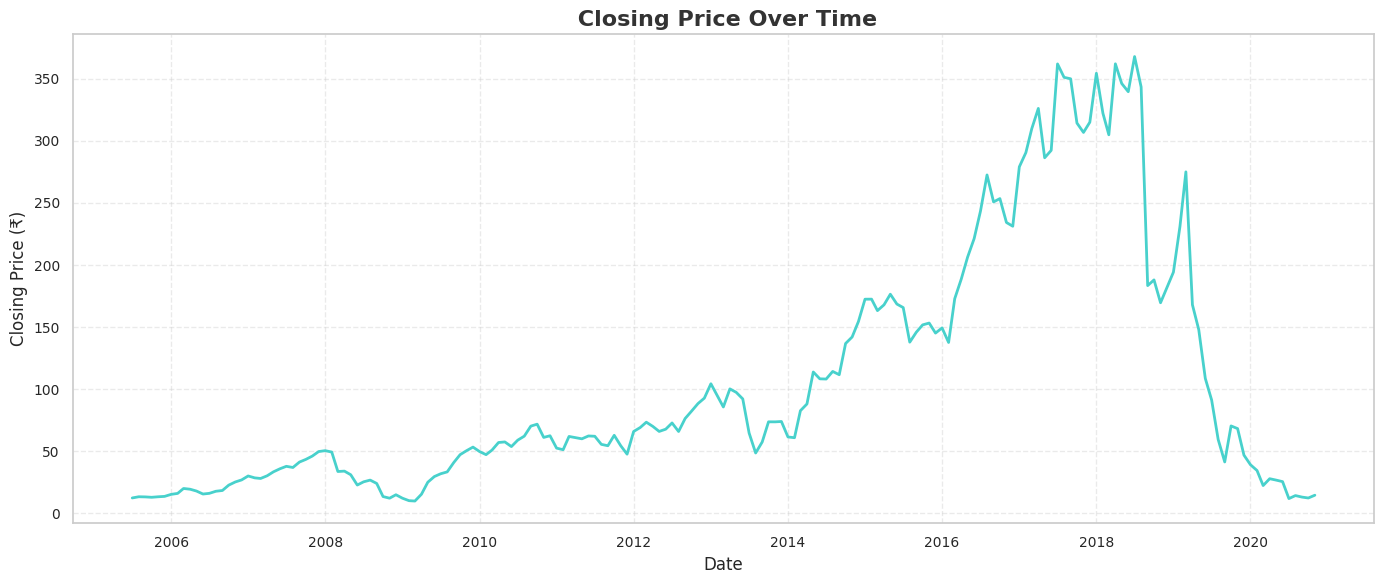

In [125]:
# Set style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 1: Yes Bank Closing Price Over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='mediumturquoise', linewidth=2)

# Add title and labels
plt.title(' Closing Price Over Time', fontsize=16, weight='bold', color='#333')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (₹)', fontsize=12)

# Grid and formatting
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

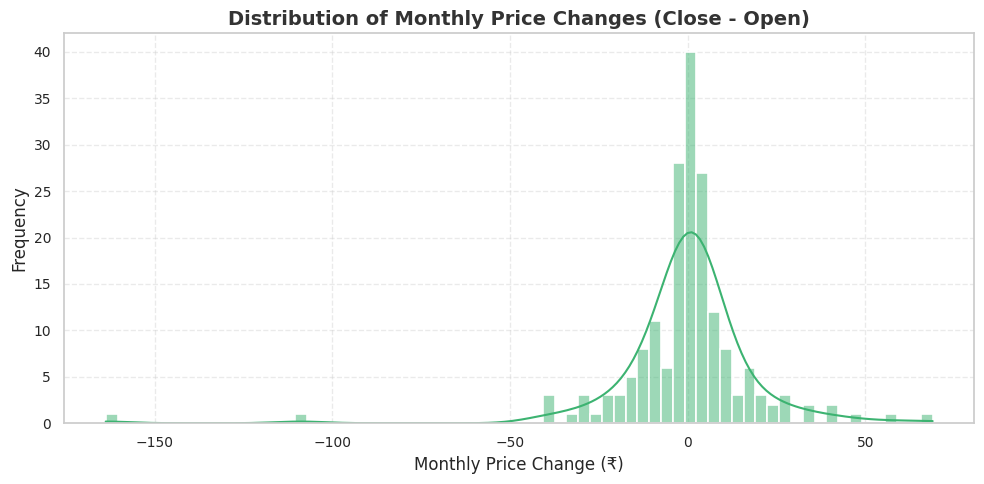

In [126]:
df['Price_Change'] = df['Close'] - df['Open']
# Set style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 2: Distribution of Monthly Price Changes
plt.figure(figsize=(10, 5))
sns.histplot(df['Price_Change'], kde=True, color='mediumseagreen', edgecolor='white', linewidth=1.2)

# Add title and labels
plt.title('Distribution of Monthly Price Changes (Close - Open)', fontsize=14, weight='bold', color='#333')
plt.xlabel('Monthly Price Change (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Grid and ticks
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [127]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='lightgreen',
    decreasing_line_color='lightcoral'
)])

fig.update_layout(
    title='Yes Bank Monthly Stock Movement',
    xaxis_title='Date',
    yaxis_title='Price (₹)',
    template='plotly_white',
    xaxis_rangeslider_visible=False,
    height=500
)

fig.show()

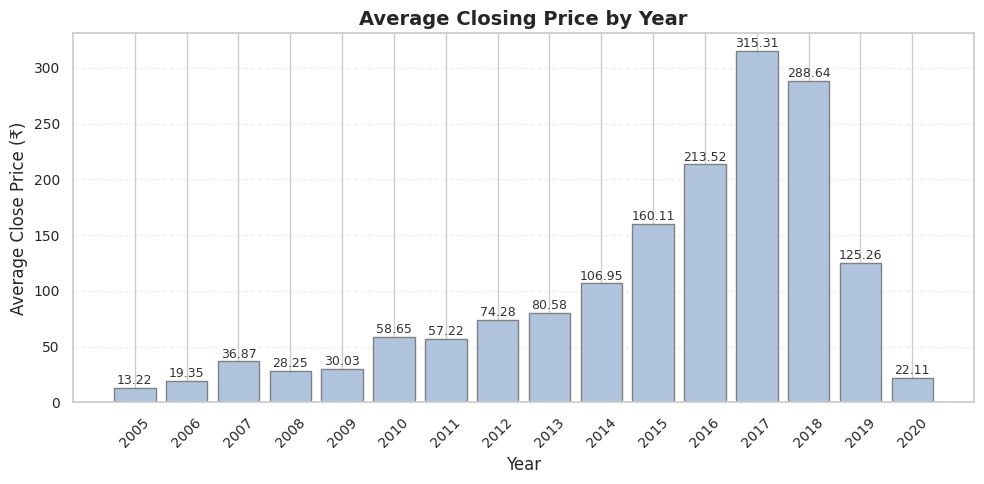

In [128]:
sns.set_style("whitegrid")

# Prepare data
yearly_avg = df.groupby('Year')['Close'].mean()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(
    x=yearly_avg.index.astype(str),
    height=yearly_avg.values,
    color='#b0c4de',  # soft pastel lavender (change to #ffd1dc for peach or #a2d2ff for powder blue)
    edgecolor='gray'
)

# Annotate values on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9, color='#333')

# Style elements
plt.title('Average Closing Price by Year', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Close Price (₹)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2618655335.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2618655335.py:11: UserWarning:

The palette list has more values (18) than needed (16), which may not be intended.



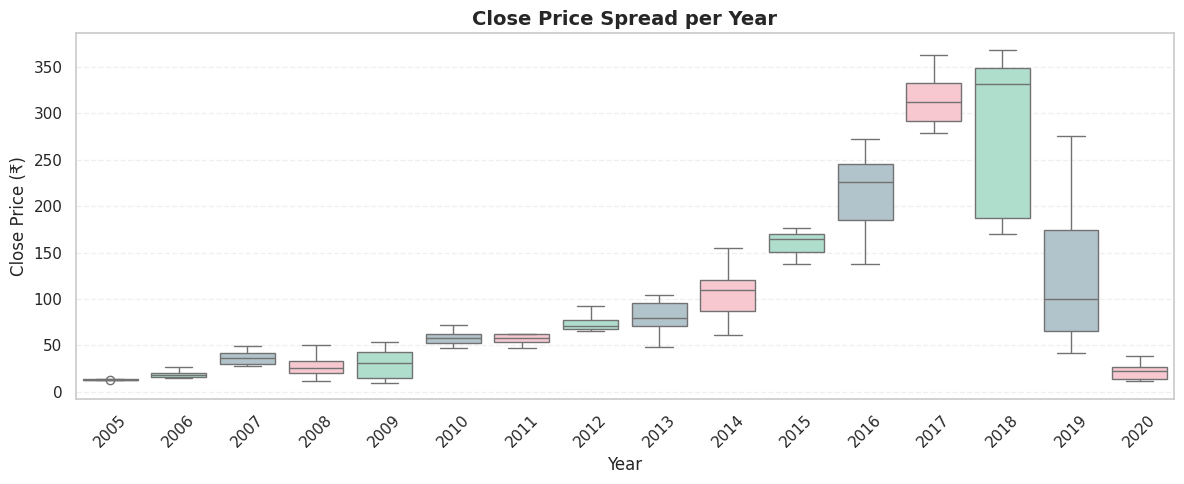

In [129]:

# Set style
sns.set_style("whitegrid")

# Define a custom pastel palette (pink, green, blue)
pastel_palette = ["#ffc0cb", "#a8e6cf", "#aec6cf"]  # pastel pink, green, blue

# Set figure
plt.figure(figsize=(12, 5))

# Draw boxplot with pastel colors
sns.boxplot(x='Year', y='Close', data=df, palette=pastel_palette * (len(df['Year'].unique()) // 3 + 1))

# Title and labels
plt.title('Close Price Spread per Year', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)

# Aesthetic touches
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

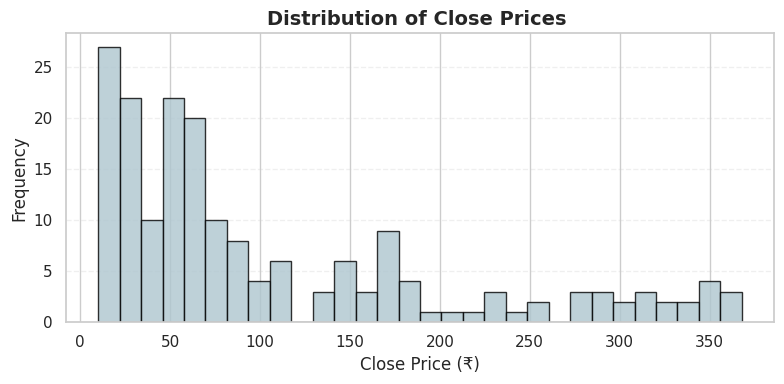

In [130]:

# Set seaborn pastel style
sns.set_style("whitegrid")

# Set figure
plt.figure(figsize=(8, 4))

# Plot histogram
df['Close'].plot(
    kind='hist',
    bins=30,
    color='#aec6cf',     # Soft pastel blue
    edgecolor='black',
    alpha=0.8
)

# Titles and labels
plt.title('Distribution of Close Prices ', fontsize=14, weight='bold')
plt.xlabel('Close Price (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

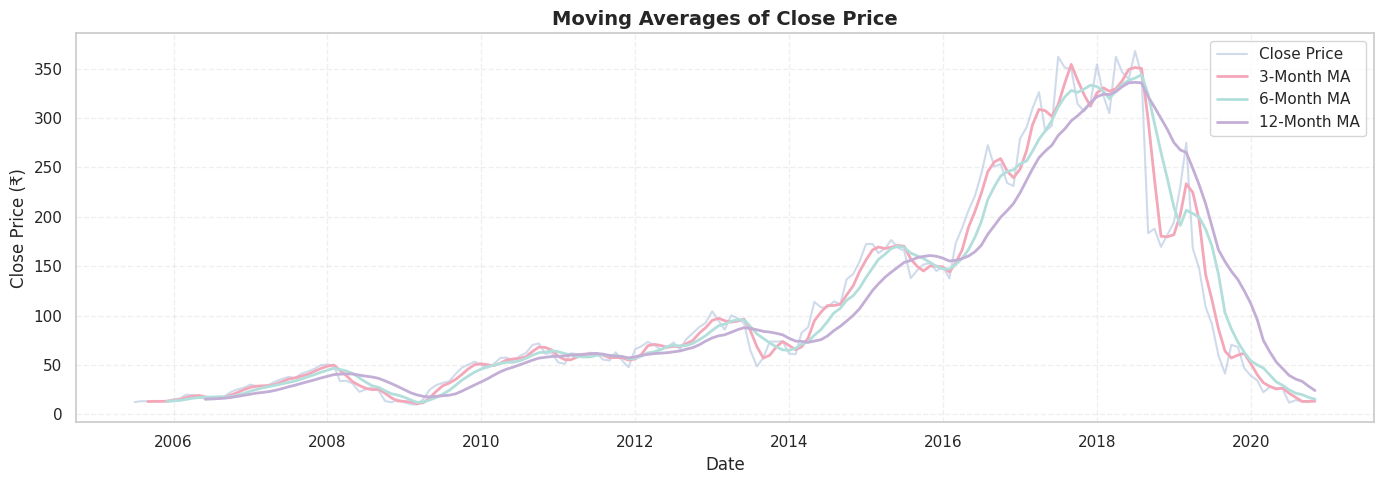

In [131]:
# Use seaborn pastel theme
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(14, 5))

# Base line: Close Price
plt.plot(df['Date'], df['Close'], label='Close Price', color='#b0c4de', linewidth=1.5, alpha=0.6)

# Moving averages in pastel tones
plt.plot(df['Date'], df['Close'].rolling(3).mean(), label='3-Month MA', color='#f4a7b9', linewidth=2)
plt.plot(df['Date'], df['Close'].rolling(6).mean(), label='6-Month MA', color='#b2dfdb', linewidth=2)
plt.plot(df['Date'], df['Close'].rolling(12).mean(), label='12-Month MA', color='#c3aed6', linewidth=2)

# Chart elements
plt.title('Moving Averages of Close Price', fontsize=14, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

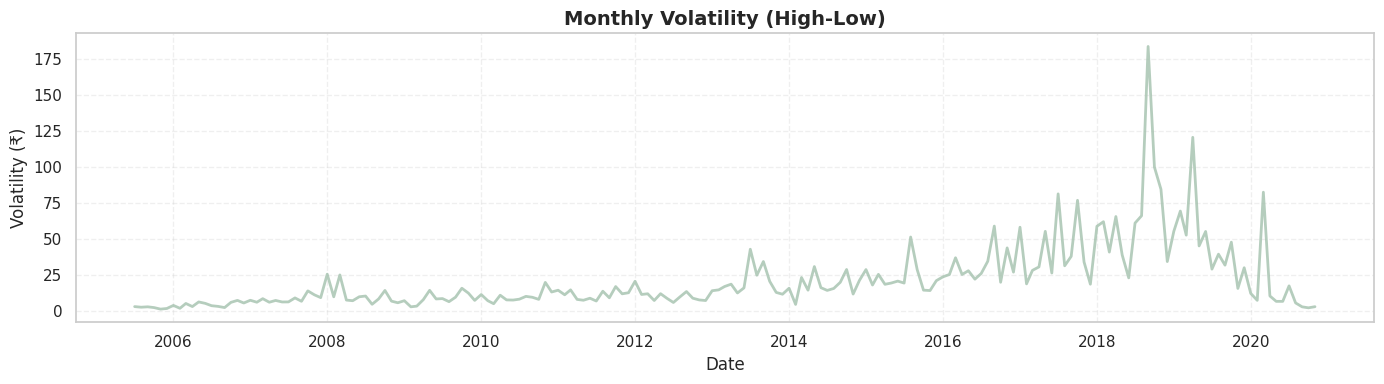

In [132]:
df['Volatility'] = df['High'] - df['Low']
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(14, 4))

# Plot with a  line
plt.plot(df['Date'], df['Volatility'], color='#a3c1ad', linewidth=2, alpha=0.8)

# Chart details
plt.title('Monthly Volatility (High‑Low)', fontsize=14, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (₹)', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

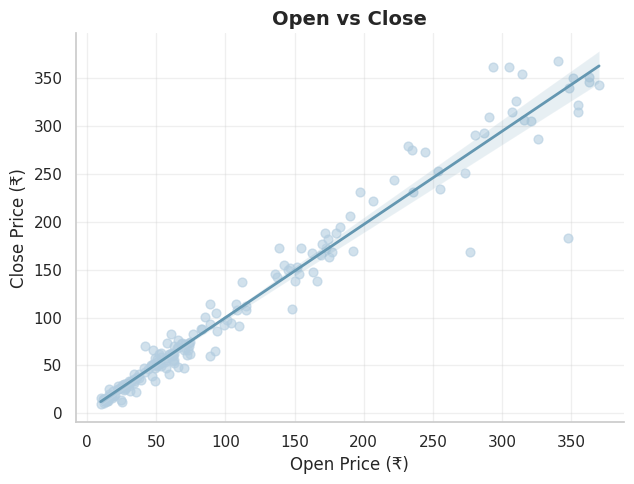

In [133]:
sns.set(style="whitegrid", palette="pastel")

# Create the regression plot
plot = sns.lmplot(
    x='Open',
    y='Close',
    data=df,
    height=5,
    aspect=1.3,
    scatter_kws={'s': 40, 'alpha': 0.6, 'color': '#b3cde0'},
    line_kws={'color': '#6497b1', 'linewidth': 2}
)

# Customize the plot
plt.title('Open vs Close', fontsize=14, weight='bold')
plt.xlabel('Open Price (₹)', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

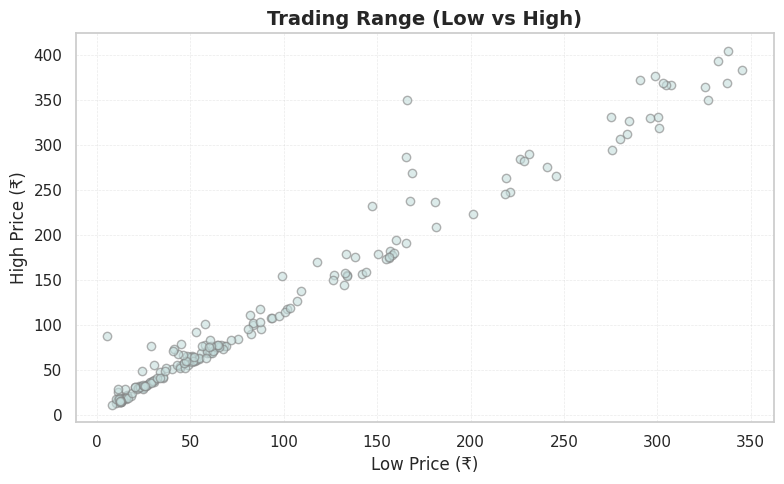

In [134]:
# Set up figure
plt.figure(figsize=(8, 5))

# Plot
plt.scatter(df['Low'], df['High'], alpha=0.6, color='#c5dedd', edgecolors='gray')

# Titles and labels
plt.xlabel('Low Price (₹)', fontsize=12)
plt.ylabel('High Price (₹)', fontsize=12)
plt.title('Trading Range (Low vs High)', fontsize=14, weight='bold')

# Add subtle grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

# Clean layout
plt.tight_layout()
plt.show()

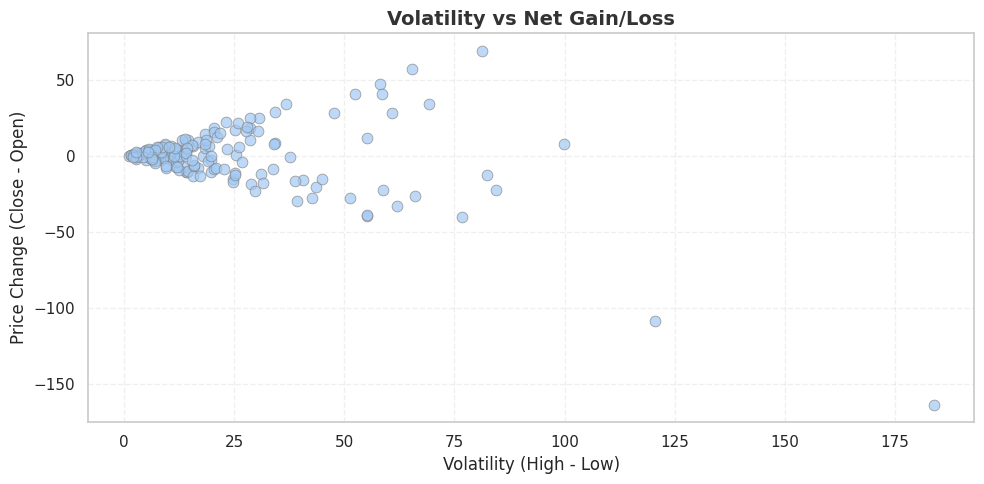

In [135]:
# Set  style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 11: Volatility vs Net Gain/Loss
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='Volatility',
    y='Price_Change',
    data=df,
    s=60,
    alpha=0.7,
    edgecolor='gray'
)

plt.title('Volatility vs Net Gain/Loss', fontsize=14, weight='bold', color='#333')
plt.xlabel('Volatility (High - Low)', fontsize=12)
plt.ylabel('Price Change (Close - Open)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

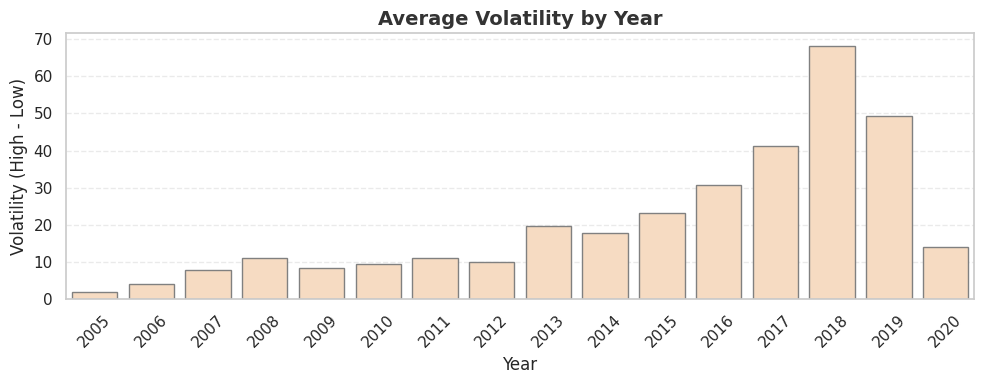

In [136]:
# Set  style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 12: Average Volatility by Year
yearly_vol = df.groupby('Year')['Volatility'].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=yearly_vol.index, y=yearly_vol.values, color='peachpuff', edgecolor='gray')

plt.title('Average Volatility by Year', fontsize=14, weight='bold', color='#333')
plt.ylabel('Volatility (High - Low)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

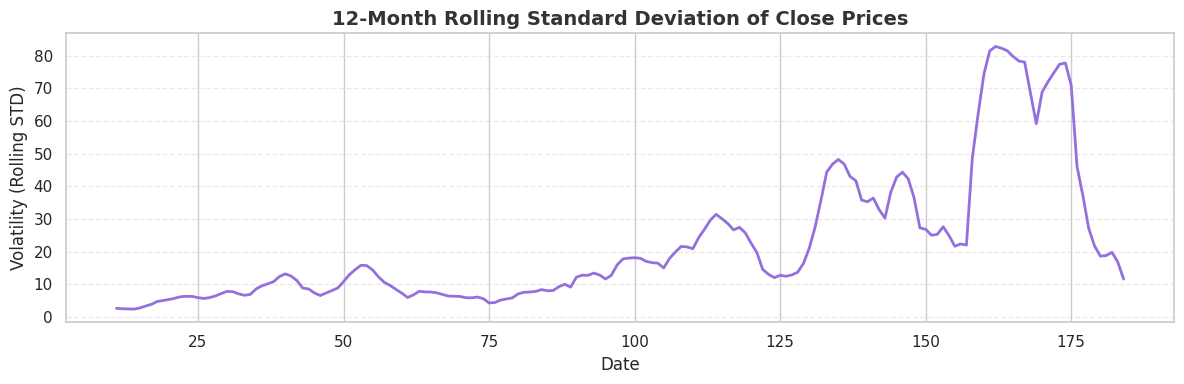

In [137]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 13: 12-Month Rolling Standard Deviation
plt.figure(figsize=(12, 4))
df['Close'].rolling(window=12).std().plot(color='mediumpurple', linewidth=2)

plt.title('12-Month Rolling Standard Deviation of Close Prices', fontsize=14, weight='bold', color='#333')
plt.ylabel('Volatility (Rolling STD)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

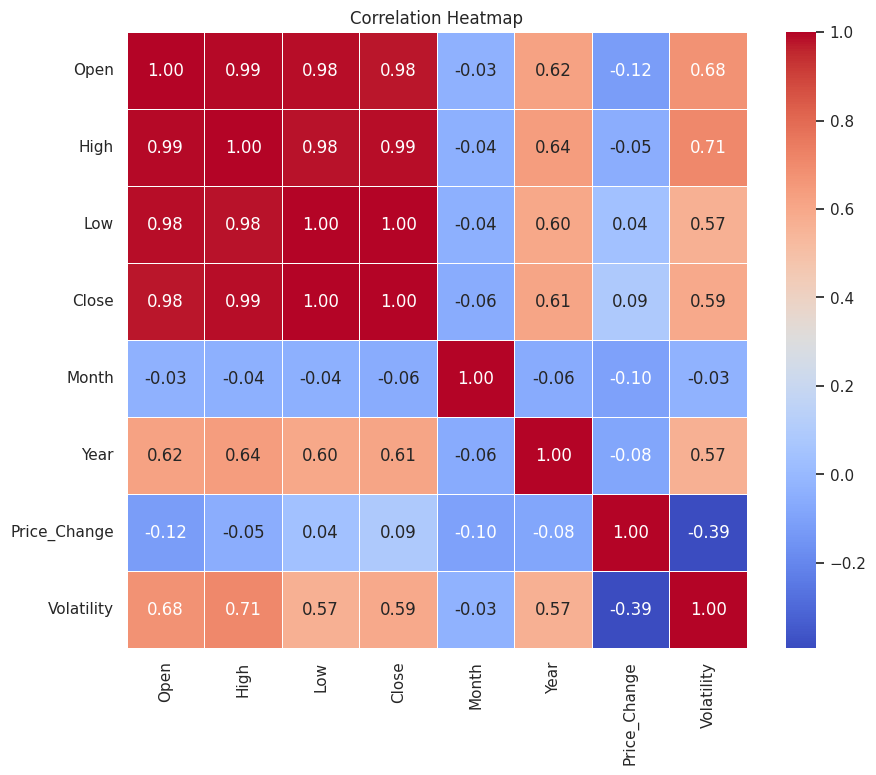

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Optional: Convert 'Date' to datetime if needed, then exclude it or convert to numeric for correlation
# For correlation, exclude non-numeric or convert accordingly
cols_to_use = ['Open', 'High', 'Low', 'Close', 'Month', 'Year', 'Price_Change', 'Volatility']

# Calculate correlation matrix
corr = df[cols_to_use].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning:



`shade` is now depre

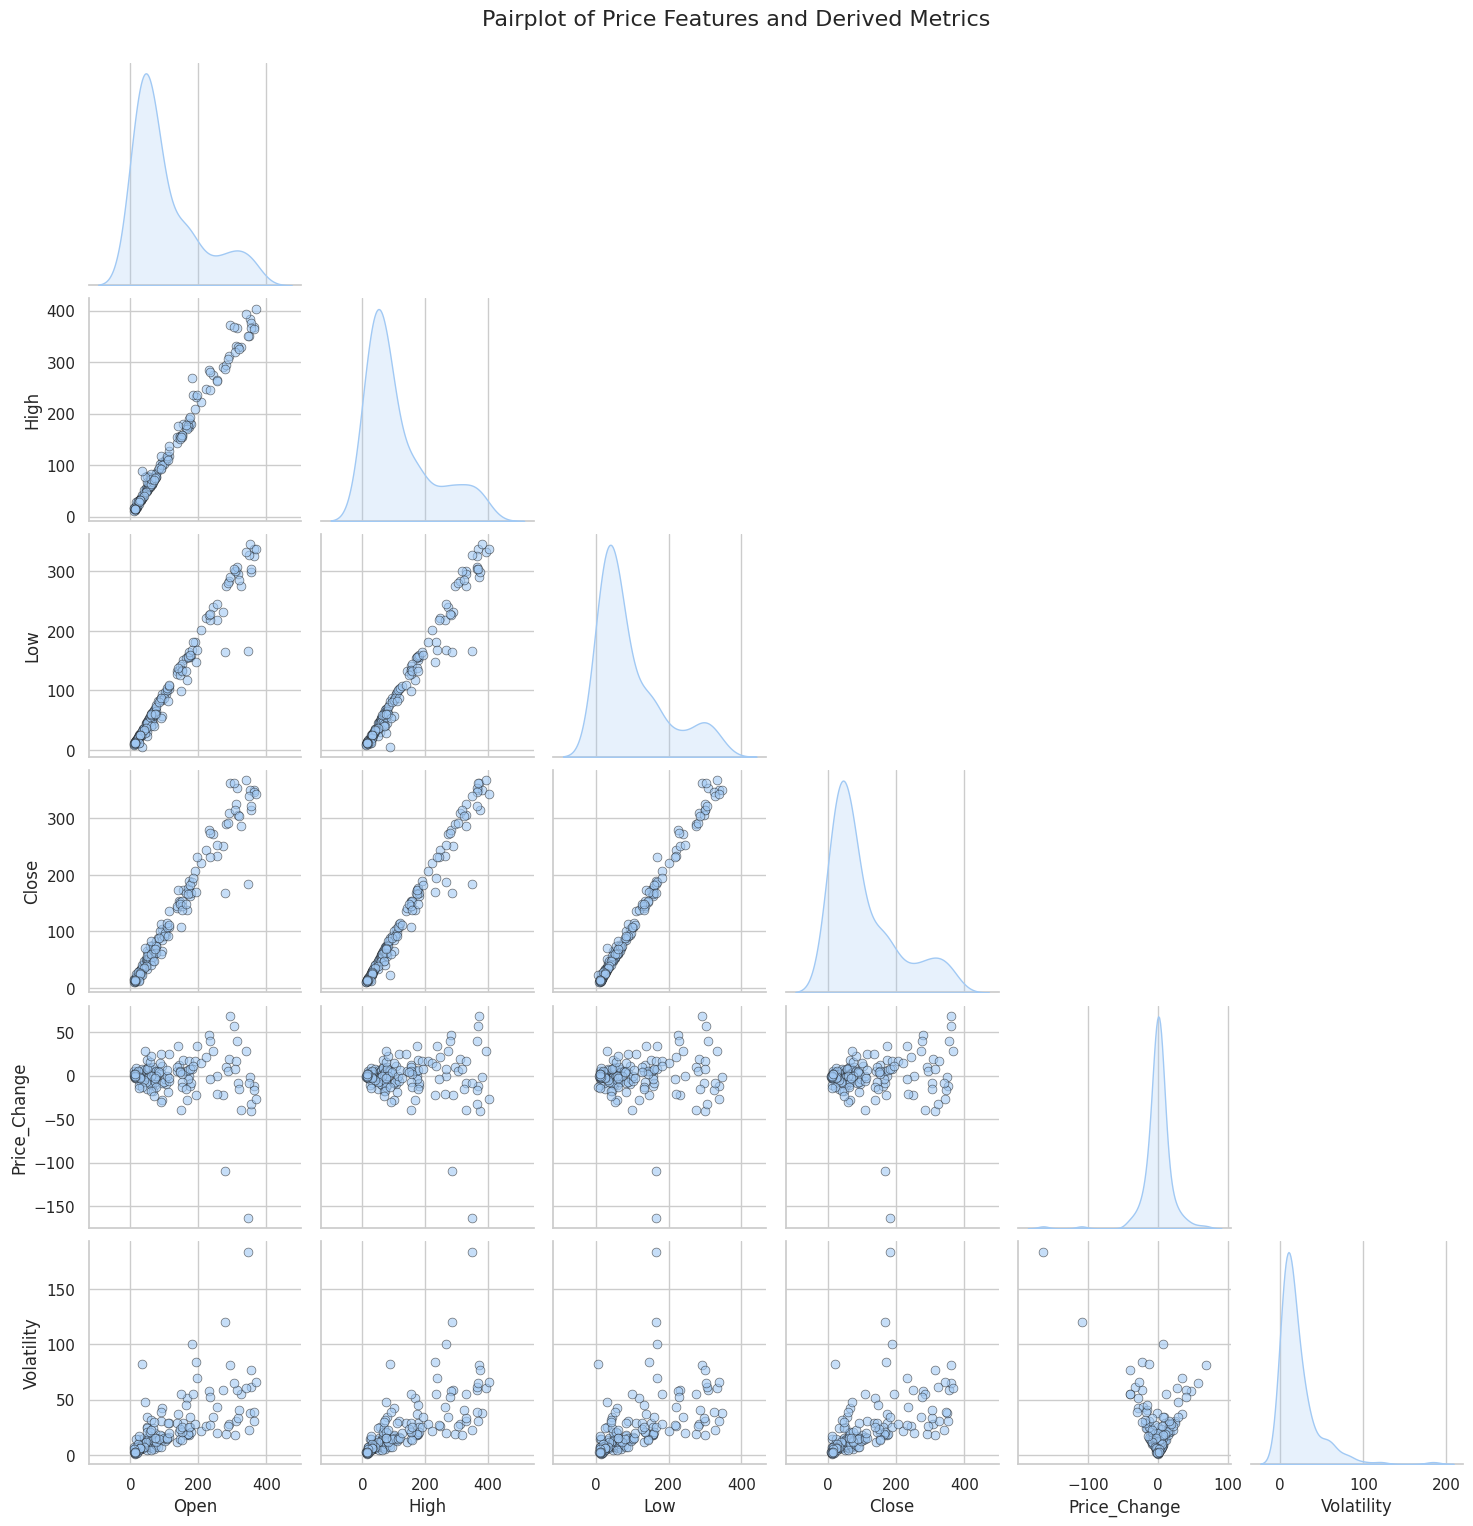

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to include in the pairplot
cols = ['Open', 'High', 'Low', 'Close', 'Price_Change', 'Volatility']

# Create the pairplot
sns.pairplot(df[cols], diag_kind='kde', corner=True,
             plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'},
             diag_kws={'shade':True})

plt.suptitle('Pairplot of Price Features and Derived Metrics', fontsize=16, y=1.02)
plt.show()

In [140]:
df.head()

,Date,Open,High,Low,Close,Month,Year,Price_Change,Volatility
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005,-0.54,2.75
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005,0.84,2.33
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005,-0.18,2.60
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005,-0.21,2.07
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005,0.06,1.00
